## 1-Import the necessary libraries

In [115]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## 2-Data Loading and splitting

In [116]:
#set the hyperparaemters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
#1.Create multi class Data
X,y=make_blobs(n_samples=1000,
               n_features=NUM_FEATURES,
               centers=NUM_CLASSES,
               random_state=RANDOM_SEED) #give the clusters a little shake up
#Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor) #why ? : lazem haka lel function mtaa el loss
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 3-Data visualization

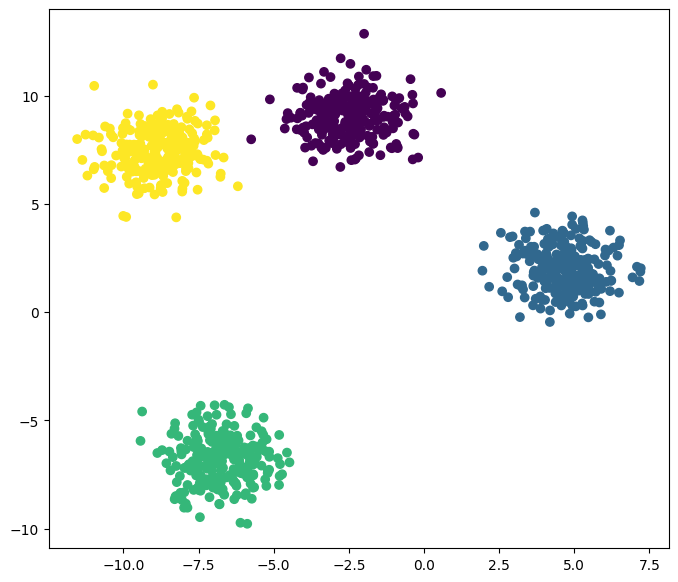

In [117]:
#visualize the data
plt.figure(figsize=(8,7))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## 4-Building the model

In [118]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [119]:
class MultiClassification(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.layer_1=nn.Linear(in_features=input_features,out_features=hidden_units)
    self.layer_2=nn.Linear(in_features=hidden_units,out_features=hidden_units)
    self.layer_3=nn.Linear(in_features=hidden_units,out_features=output_features)
    self.relu = nn.ReLU()  # Correct: ReLU with capital 'U'
  def forward(self,input):
    x = self.relu(self.layer_1(input))
    x = self.relu(self.layer_2(x))
    x = self.layer_3(x)
    return x

In [120]:
model = MultiClassification(NUM_FEATURES,NUM_CLASSES).to(device)
model

MultiClassification(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

##5-Training the model

In [121]:
#evaluation metric : accuracy - out of 100 examples , what percentages does our model get right ?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()  # how many of y_true are equal to y_pred , item because we want it a single value
  acc = (correct / len(y_pred))*100
  return acc

In [122]:
#create a loss function
loss_fn=nn.CrossEntropyLoss()
#create an optimizer for multi class classification (optimizers are quite flexible)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [123]:
X_train,X_test = X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

In [124]:
model.eval()
with torch.inference_mode():
  y_preds=model(X_train)
y_preds

tensor([[ 0.2329, -0.3510,  0.3989, -0.2666],
        [ 0.0969, -0.0778,  0.0591, -0.0199],
        [ 0.8874, -0.4081,  2.1837, -0.8327],
        ...,
        [ 0.0880, -0.1295,  0.0896, -0.0387],
        [ 0.7684, -0.3573,  1.8810, -0.7281],
        [ 0.1625,  0.0154,  0.2287,  0.0022]])

In [125]:
y_preds=torch.softmax(y_preds,dim=1)
y_preds

tensor([[0.2989, 0.1667, 0.3529, 0.1814],
        [0.2708, 0.2274, 0.2608, 0.2410],
        [0.1957, 0.0536, 0.7156, 0.0350],
        ...,
        [0.2712, 0.2182, 0.2716, 0.2390],
        [0.2178, 0.0707, 0.6627, 0.0488],
        [0.2643, 0.2282, 0.2824, 0.2252]])

In [126]:
y_preds=torch.argmax(y_preds,dim=1)
y_preds

tensor([2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
        0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
        0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2,
        0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2,
        2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0,
        2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
        0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,

In [127]:
epochs = 40
for epoch in range(epochs):
  #
  model.train()
  #make predictions
  y_logits=model(X_train)
  y_preds=torch.softmax(y_logits,dim=1)
  y_preds=torch.argmax(y_preds,dim=1).squeeze()
  #accuracy / lloss
  loss = loss_fn(y_logits, y_train)
  accuracy=accuracy_fn(y_preds,y_train)
  #zero grad
  optimizer.zero_grad()
  #calculat the gradient
  loss.backward()
  #update params
  optimizer.step()
  if epoch%10==0:
    model.eval()
    y_logits=model(X_test)
    y_preds=torch.softmax(y_logits,dim=1)
    y_preds=torch.argmax(y_preds,dim=1).squeeze()
    #accuracy / lloss
    loss_test = loss_fn(y_logits, y_test)
    accuracy_test=accuracy_fn(y_preds,y_test)
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f},Train Acc: {accuracy:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {accuracy_test:.2f}%")


Epoch: 0 | Train Loss: 1.24712,Train Acc: 42.25% | Test Loss: 1.09333, Test Acc: 50.50%
Epoch: 10 | Train Loss: 0.68752,Train Acc: 75.75% | Test Loss: 0.69313, Test Acc: 81.50%
Epoch: 20 | Train Loss: 0.30313,Train Acc: 98.38% | Test Loss: 0.27828, Test Acc: 99.00%
Epoch: 30 | Train Loss: 0.09056,Train Acc: 99.88% | Test Loss: 0.08125, Test Acc: 100.00%


## 6-Making predictions

In [128]:
X_test = X_test.to("cpu")
x_min,x_max = X_test[:,0].min() -0.1,X_test[:,1].max() +0.1
y_min,y_max = X_test[:,1].min()-0.1,X_test[:,1].max() +0.1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,101),(np.linspace(y_min,y_max,101)))
yy

array([[-8.9555769 , -8.9555769 , -8.9555769 , ..., -8.9555769 ,
        -8.9555769 , -8.9555769 ],
       [-8.75578409, -8.75578409, -8.75578409, ..., -8.75578409,
        -8.75578409, -8.75578409],
       [-8.55599129, -8.55599129, -8.55599129, ..., -8.55599129,
        -8.55599129, -8.55599129],
       ...,
       [10.62411797, 10.62411797, 10.62411797, ..., 10.62411797,
        10.62411797, 10.62411797],
       [10.82391077, 10.82391077, 10.82391077, ..., 10.82391077,
        10.82391077, 10.82391077],
       [11.02370358, 11.02370358, 11.02370358, ..., 11.02370358,
        11.02370358, 11.02370358]])

In [129]:
X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float() #ravel flattens the 2d numpy array to a 1d , then column stack will create a 2d array of xx & yy
X_to_pred_on

tensor([[-11.3013,  -8.9556],
        [-11.0780,  -8.9556],
        [-10.8548,  -8.9556],
        ...,
        [ 10.5772,  11.0237],
        [ 10.8005,  11.0237],
        [ 11.0237,  11.0237]])

In [130]:
model.eval()
X_to_pred_on=X_to_pred_on.to(device)
with torch.inference_mode():
  y_logits = model(X_to_pred_on)
y_pred = torch.argmax(torch.softmax(y_logits,dim=1),dim=1)
y_pred

tensor([2, 2, 2,  ..., 1, 1, 1])

In [131]:
y_pred=y_pred.reshape(xx.shape).detach().numpy()

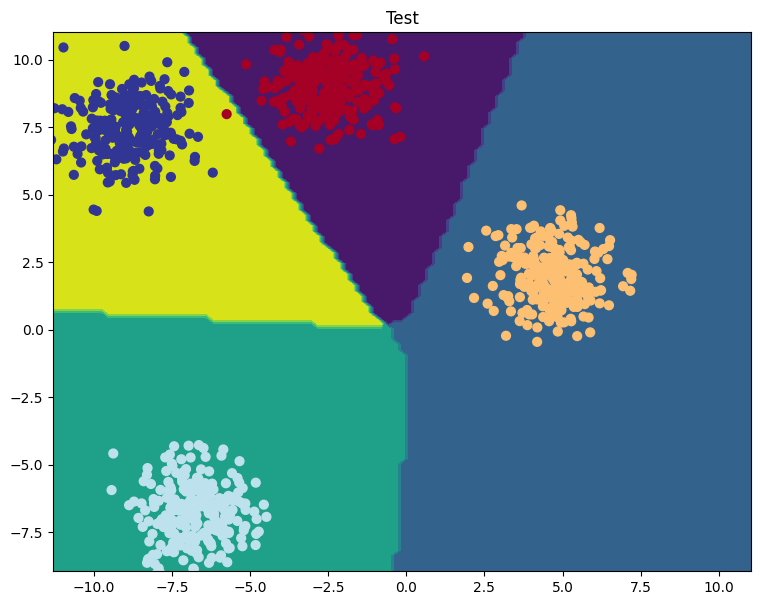

In [132]:
plt.figure(figsize=(9,7))
plt.contourf(xx,yy,y_pred)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.RdYlBu)
plt.title("Test")
plt.show()